In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import re

### Load dataset

In [219]:
# Load the dataset
file_path = 'data\Bank Data.csv'
df = pd.read_csv(file_path)

### Data Exploration and Preprocessing:

In [220]:
df.shape

(50000, 27)

In [221]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [222]:
print(df.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           42502.000000       50000.000000     50000.000000   
mean             4182.004291          16.838260        22.921480   
std              3174.109304         116.396848       129.314804   
min               303.645417          -1.000000         0.000000   
25%              1625.188333           3.000000         4.000000   
50%              3086.305000           6.000000         5.000000   
75%              5934.189094           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   50000.000000         50000.000000          48965.000000   
mean       68.772640            21.052640             30.080200   
std       451.602363            14.860397            196.984121   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

In [223]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'Yes', 'NM'], dtype=object)

In [224]:
 # Define a function to remove non-numeric characters from a string
def remove_non_numeric(x):
    # Replace non-numeric characters with an empty string
    cleaned_str = re.sub(r'[^0-9.-]', '', str(x))
    return cleaned_str

In [225]:
df['Annual_Income'] = df['Annual_Income'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Monthly_Balance'] = df['Monthly_Balance'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Num_of_Loan'] = df['Num_of_Loan'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')
df['Age'] = df['Age'].apply(remove_non_numeric).apply(pd.to_numeric, errors='coerce')

In [226]:
# Convert columns to numeric
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'])
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'])

df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'])
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'])
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'])

df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'])
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'])

In [227]:
df.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh   24  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist       19114.12            1824.843333                  3  ...   
1  Scientist       19114.12            1824.843333                  3  ...   
2  Scientist       19114.12            1824.843333                  3  ...   
3  Scientist       19114.12                    NaN                  3  ...   
4    _______       34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                2022.0        Good            809.98   
1                   4.0        Good            809.98   
2                   4.0        Good            809.98   
3                   4.0        Good            809.98   
4                   5.0        Good            605.03   

  Credit_Utilization_Ratio      Credit_History_Age  Payment_of_Min_Amount  \
0                35.030402   22 Years and 9 Months                     No   
1                33.053114  22 Years and 10 Months                     No   
2                33.811894                     NaN                     No   
3                32.430559   23 Years and 0 Months                     No   
4                25.926822   27 Years and 3 Months                     No   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949               236.642682   
1            49.574949                21.465380   
2            49.574949               148.233938   
3            49.574949                39.082511   
4            18.816215                39.684018   

                  Payment_Behaviour  Monthly_Balance  
0    Low_spent_Small_value_payments       186.266702  
1  High_spent_Medium_value_payments       361.444004  
2   Low_spent_Medium_value_payments       264.675446  
3  High_spent_Medium_value_payments       343.826873  
4   High_spent_Large_value_payments       485.298434  

[5 rows x 27 columns]

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  int64  
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  int64  
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [229]:
# Display statistics for categorical columns
df.describe(include='object')

ID Customer_ID      Month    Name        SSN Occupation  \
count    50000       50000      50000   44985      50000      50000   
unique   50000       12500          4   10139      12501         16   
top     0x160a   CUS_0xd40  September  Stevex  #F%$D@*&8    _______   
freq         1           4      12500      22       2828       3438   

         Type_of_Loan Credit_Mix     Credit_History_Age Payment_of_Min_Amount  \
count           44296      50000                  45530                 50000   
unique           6260          4                    399                     3   
top     Not Specified   Standard  20 Years and 1 Months                   Yes   
freq              704      18379                    254                 26158   

                     Payment_Behaviour  
count                            50000  
unique                               7  
top     Low_spent_Small_value_payments  
freq                             12694

### Handing Missing Values

In [230]:
# Checking for missing values
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [231]:
# Filter rows where 'Customer_Name' is null
df[df['Name'].isnull()].head()

ID Customer_ID      Month Name  Age          SSN     Occupation  \
10  0x1624  CUS_0x2dbc   November  NaN   35  486-85-3974       Engineer   
30  0x1660  CUS_0x5407   November  NaN   31  500-92-6408  Media_Manager   
38  0x1678  CUS_0xba08   November  NaN   45  366-68-1681     Journalist   
64  0x16ca  CUS_0x6070  September  NaN   21  891-55-9364     Accountant   
69  0x16d7   CUS_0xfdb    October  NaN   46    #F%$D@*&8        Teacher   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
10      143162.64           12187.220000                  1  ...   
30       34081.38            2611.115000                  8  ...   
38       31370.80            2825.233333                  1  ...   
64       92047.08            7591.590000                  6  ...   
69       32284.62            2749.762492                  6  ...   

    Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
10                   5.0        Good           1303.01   
30                   9.0    Standard           1704.18   
38                   5.0           _            421.43   
64                   4.0           _           1296.64   
69                  10.0    Standard           1283.37   

   Credit_Utilization_Ratio      Credit_History_Age  Payment_of_Min_Amount  \
10                31.819845   18 Years and 7 Months                     No   
30                35.822516   15 Years and 5 Months                     NM   
38                25.682271   27 Years and 3 Months                     No   
64                39.368250  29 Years and 10 Months                    Yes   
69                38.284463    7 Years and 2 Months                    Yes   

    Total_EMI_per_month  Amount_invested_monthly  \
10           246.992319               841.232236   
30            70.478333                50.130960   
38            46.616129                88.614438   
64             0.000000               629.407021   
69           251.660068               171.762459   

                   Payment_Behaviour  Monthly_Balance  
10   Low_spent_Medium_value_payments       410.497445  
30  High_spent_Medium_value_payments       390.502207  
38  High_spent_Medium_value_payments       397.292767  
64   Low_spent_Medium_value_payments       409.751979  
69                            !@9#%8       285.038481  

[5 rows x 27 columns]

In [232]:
# Drop Unncessary features
df.drop(['ID','Customer_ID','Name'], axis=1, inplace=True)

In [233]:
df.head()

Month  Age          SSN Occupation  Annual_Income  \
0  September   23  821-00-0265  Scientist       19114.12   
1    October   24  821-00-0265  Scientist       19114.12   
2   November   24  821-00-0265  Scientist       19114.12   
3   December   24  821-00-0265  Scientist       19114.12   
4  September   28  004-07-5839    _______       34847.84   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            1824.843333                  3                4              3   
2            1824.843333                  3                4              3   
3                    NaN                  3                4              3   
4            3037.986667                  2                4              6   

   Num_of_Loan  ... Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0            4  ...               2022.0        Good            809.98   
1            4  ...                  4.0        Good            809.98   
2            4  ...                  4.0        Good            809.98   
3            4  ...                  4.0        Good            809.98   
4            1  ...                  5.0        Good            605.03   

   Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                 35.030402   22 Years and 9 Months                    No   
1                 33.053114  22 Years and 10 Months                    No   
2                 33.811894                     NaN                    No   
3                 32.430559   23 Years and 0 Months                    No   
4                 25.926822   27 Years and 3 Months                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949               236.642682   
1            49.574949                21.465380   
2            49.574949               148.233938   
3            49.574949                39.082511   
4            18.816215                39.684018   

                  Payment_Behaviour Monthly_Balance  
0    Low_spent_Small_value_payments      186.266702  
1  High_spent_Medium_value_payments      361.444004  
2   Low_spent_Medium_value_payments      264.675446  
3  High_spent_Medium_value_payments      343.826873  
4   High_spent_Large_value_payments      485.298434  

[5 rows x 24 columns]

In [234]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [235]:
# Object of Simple Imputer
imputer = SimpleImputer(strategy='median')

In [236]:
# Replace Invalid value on Occupation column

# define invalid values (e.g., 'invalid' or empty string)
invalid_values = ['_______', '']

# Replace invalid values with NaN
df['Occupation'] = df['Occupation'].replace(invalid_values, np.nan)

# Replace invalid value by most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df['Occupation'] = imputer.fit_transform(df[['Occupation']])[:, 0]

print(df['Occupation'].unique())

['Scientist' 'Lawyer' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [237]:
df['Credit_History_Age'].unique()

array(['22 Years and 9 Months', '22 Years and 10 Months', nan,
       '23 Years and 0 Months', '27 Years and 3 Months',
       '27 Years and 4 Months', '27 Years and 5 Months',
       '27 Years and 6 Months', '18 Years and 5 Months',
       '18 Years and 6 Months', '18 Years and 7 Months',
       '17 Years and 11 Months', '18 Years and 0 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '31 Years and 4 Months', '31 Years and 5 Months',
       '31 Years and 7 Months', '32 Years and 7 Months',
       '32 Years and 8 Months', '32 Years and 9 Months',
       '32 Years and 10 Months', '31 Years and 6 Months',
       '15 Years and 3 Months', '15 Years and 4 Months',
       '15 Years and 5 Months', '15 Years and 6 Months',
       '22 Years and 0 Months', '22 Years and 1 Months',
       '22 Years and 2 Months', '22 Years and 3 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '19 Years and 10 Months', '19 Years and 11 Months',
       '20 Years and 

In [238]:
def convert_to_total_months(duration):
    if isinstance(duration, str):
        years, months = duration.split(' Years and ')
        years = int(years)
        months = int(months.split(' Months')[0])
        total_months = years * 12 + months
        return total_months
    else:
        return np.nan  

In [239]:
# Function to convert text to total months
def convert_to_months(text):
    # Find all numbers in the text
    numbers = re.findall(r'\d+', text)
    
    # Extract years and months from the found numbers
    if len(numbers) == 2:
        years = int(numbers[0])
        months = int(numbers[1])
    elif len(numbers) == 1:
        if 'Years' in text:
            years = int(numbers[0])
            months = 0
        else:
            years = 0
            months = int(numbers[0])
    else:
        years = 0
        months = 0
    
    # Convert to total months
    total_months = years * 12 + months
    return total_months

In [240]:
# Apply the function to the 'Duration' column
df['Credit_History_Age_Month'] = df['Credit_History_Age'].apply(convert_to_total_months)


In [241]:
df.drop(['Credit_History_Age'], axis=1, inplace=True)

In [242]:
# Convert the column to float and truncate to three decimal places
df['Monthly_Balance'] = df['Monthly_Balance'].replace('', '0')
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: '{:.3f}'.format(float(x)))

In [244]:
df.head(5)

Month  Age          SSN Occupation  Annual_Income  \
0  September   23  821-00-0265  Scientist       19114.12   
1    October   24  821-00-0265  Scientist       19114.12   
2   November   24  821-00-0265  Scientist       19114.12   
3   December   24  821-00-0265  Scientist       19114.12   
4  September   28  004-07-5839     Lawyer       34847.84   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            1824.843333                  3                4              3   
2            1824.843333                  3                4              3   
3                    NaN                  3                4              3   
4            3037.986667                  2                4              6   

   Num_of_Loan  ... Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0            4  ...               2022.0        Good            809.98   
1            4  ...                  4.0        Good            809.98   
2            4  ...                  4.0        Good            809.98   
3            4  ...                  4.0        Good            809.98   
4            1  ...                  5.0        Good            605.03   

   Credit_Utilization_Ratio  Payment_of_Min_Amount Total_EMI_per_month  \
0                 35.030402                     No           49.574949   
1                 33.053114                     No           49.574949   
2                 33.811894                     No           49.574949   
3                 32.430559                     No           49.574949   
4                 25.926822                     No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour Monthly_Balance  \
0               236.642682    Low_spent_Small_value_payments         186.267   
1                21.465380  High_spent_Medium_value_payments         361.444   
2               148.233938   Low_spent_Medium_value_payments         264.675   
3                39.082511  High_spent_Medium_value_payments         343.827   
4                39.684018   High_spent_Large_value_payments         485.298   

   Credit_History_Age_Month  
0                     273.0  
1                     274.0  
2                       NaN  
3                     276.0  
4                     327.0  

[5 rows x 24 columns]

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  int64  
 2   SSN                       50000 non-null  object 
 3   Occupation                50000 non-null  object 
 4   Annual_Income             50000 non-null  float64
 5   Monthly_Inhand_Salary     42502 non-null  float64
 6   Num_Bank_Accounts         50000 non-null  int64  
 7   Num_Credit_Card           50000 non-null  int64  
 8   Interest_Rate             50000 non-null  int64  
 9   Num_of_Loan               50000 non-null  int64  
 10  Type_of_Loan              44296 non-null  object 
 11  Delay_from_due_date       50000 non-null  int64  
 12  Num_of_Delayed_Payment    46502 non-null  float64
 13  Changed_Credit_Limit      48941 non-null  float64
 14  Num_Cr

In [246]:
# Checking for missing values
df.isnull().sum()

Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance                0
Credit_History_Age_Month    4470
dtype: int64

In [247]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [248]:
# Replace Invalid value on Type_of_Loan column

# define invalid values (e.g., 'invalid' or empty string)
invalid_values = ['...', '']

# Replace invalid values with NaN
df['Type_of_Loan'] = df['Type_of_Loan'].replace(invalid_values, np.nan)

# Replace invalid value by most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df['Type_of_Loan'] = imputer.fit_transform(df[['Type_of_Loan']])[:, 0]

print(df['Type_of_Loan'].unique())

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [249]:
#### Replace missing value of numeric column using median value

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

# Fit and transform the data
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


Numeric columns: Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Credit_History_Age_Month'],
      dtype='object')


In [250]:
# Checking for missing values
df.isnull().sum()

Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_History_Age_Month    0
dtype: int64

In [251]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    26158
No     17849
NM      5993
Name: count, dtype: int64

In [252]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64

In [253]:
# Replace Invalid value on Credit_Mix column

# define invalid values (e.g., 'invalid' or empty string)
invalid_values = ['_', '']

# Replace invalid values with NaN
df['Credit_Mix'] = df['Credit_Mix'].replace(invalid_values, np.nan)

# Replace invalid value by most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df['Credit_Mix'] = imputer.fit_transform(df[['Credit_Mix']])[:, 0]

print(df['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


In [254]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: count, dtype: int64

In [255]:
# Replace Invalid value on Payment_Behaviour column

# define invalid values (e.g., 'invalid' or empty string)
invalid_values = ['!@9#%8', '']

# Replace invalid values with NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(invalid_values, np.nan)

# Replace invalid value by most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df['Payment_Behaviour'] = imputer.fit_transform(df[['Payment_Behaviour']])[:, 0]

print(df['Payment_Behaviour'].unique())

['Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Large_value_payments' 'High_spent_Small_value_payments']


#### Outlier

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


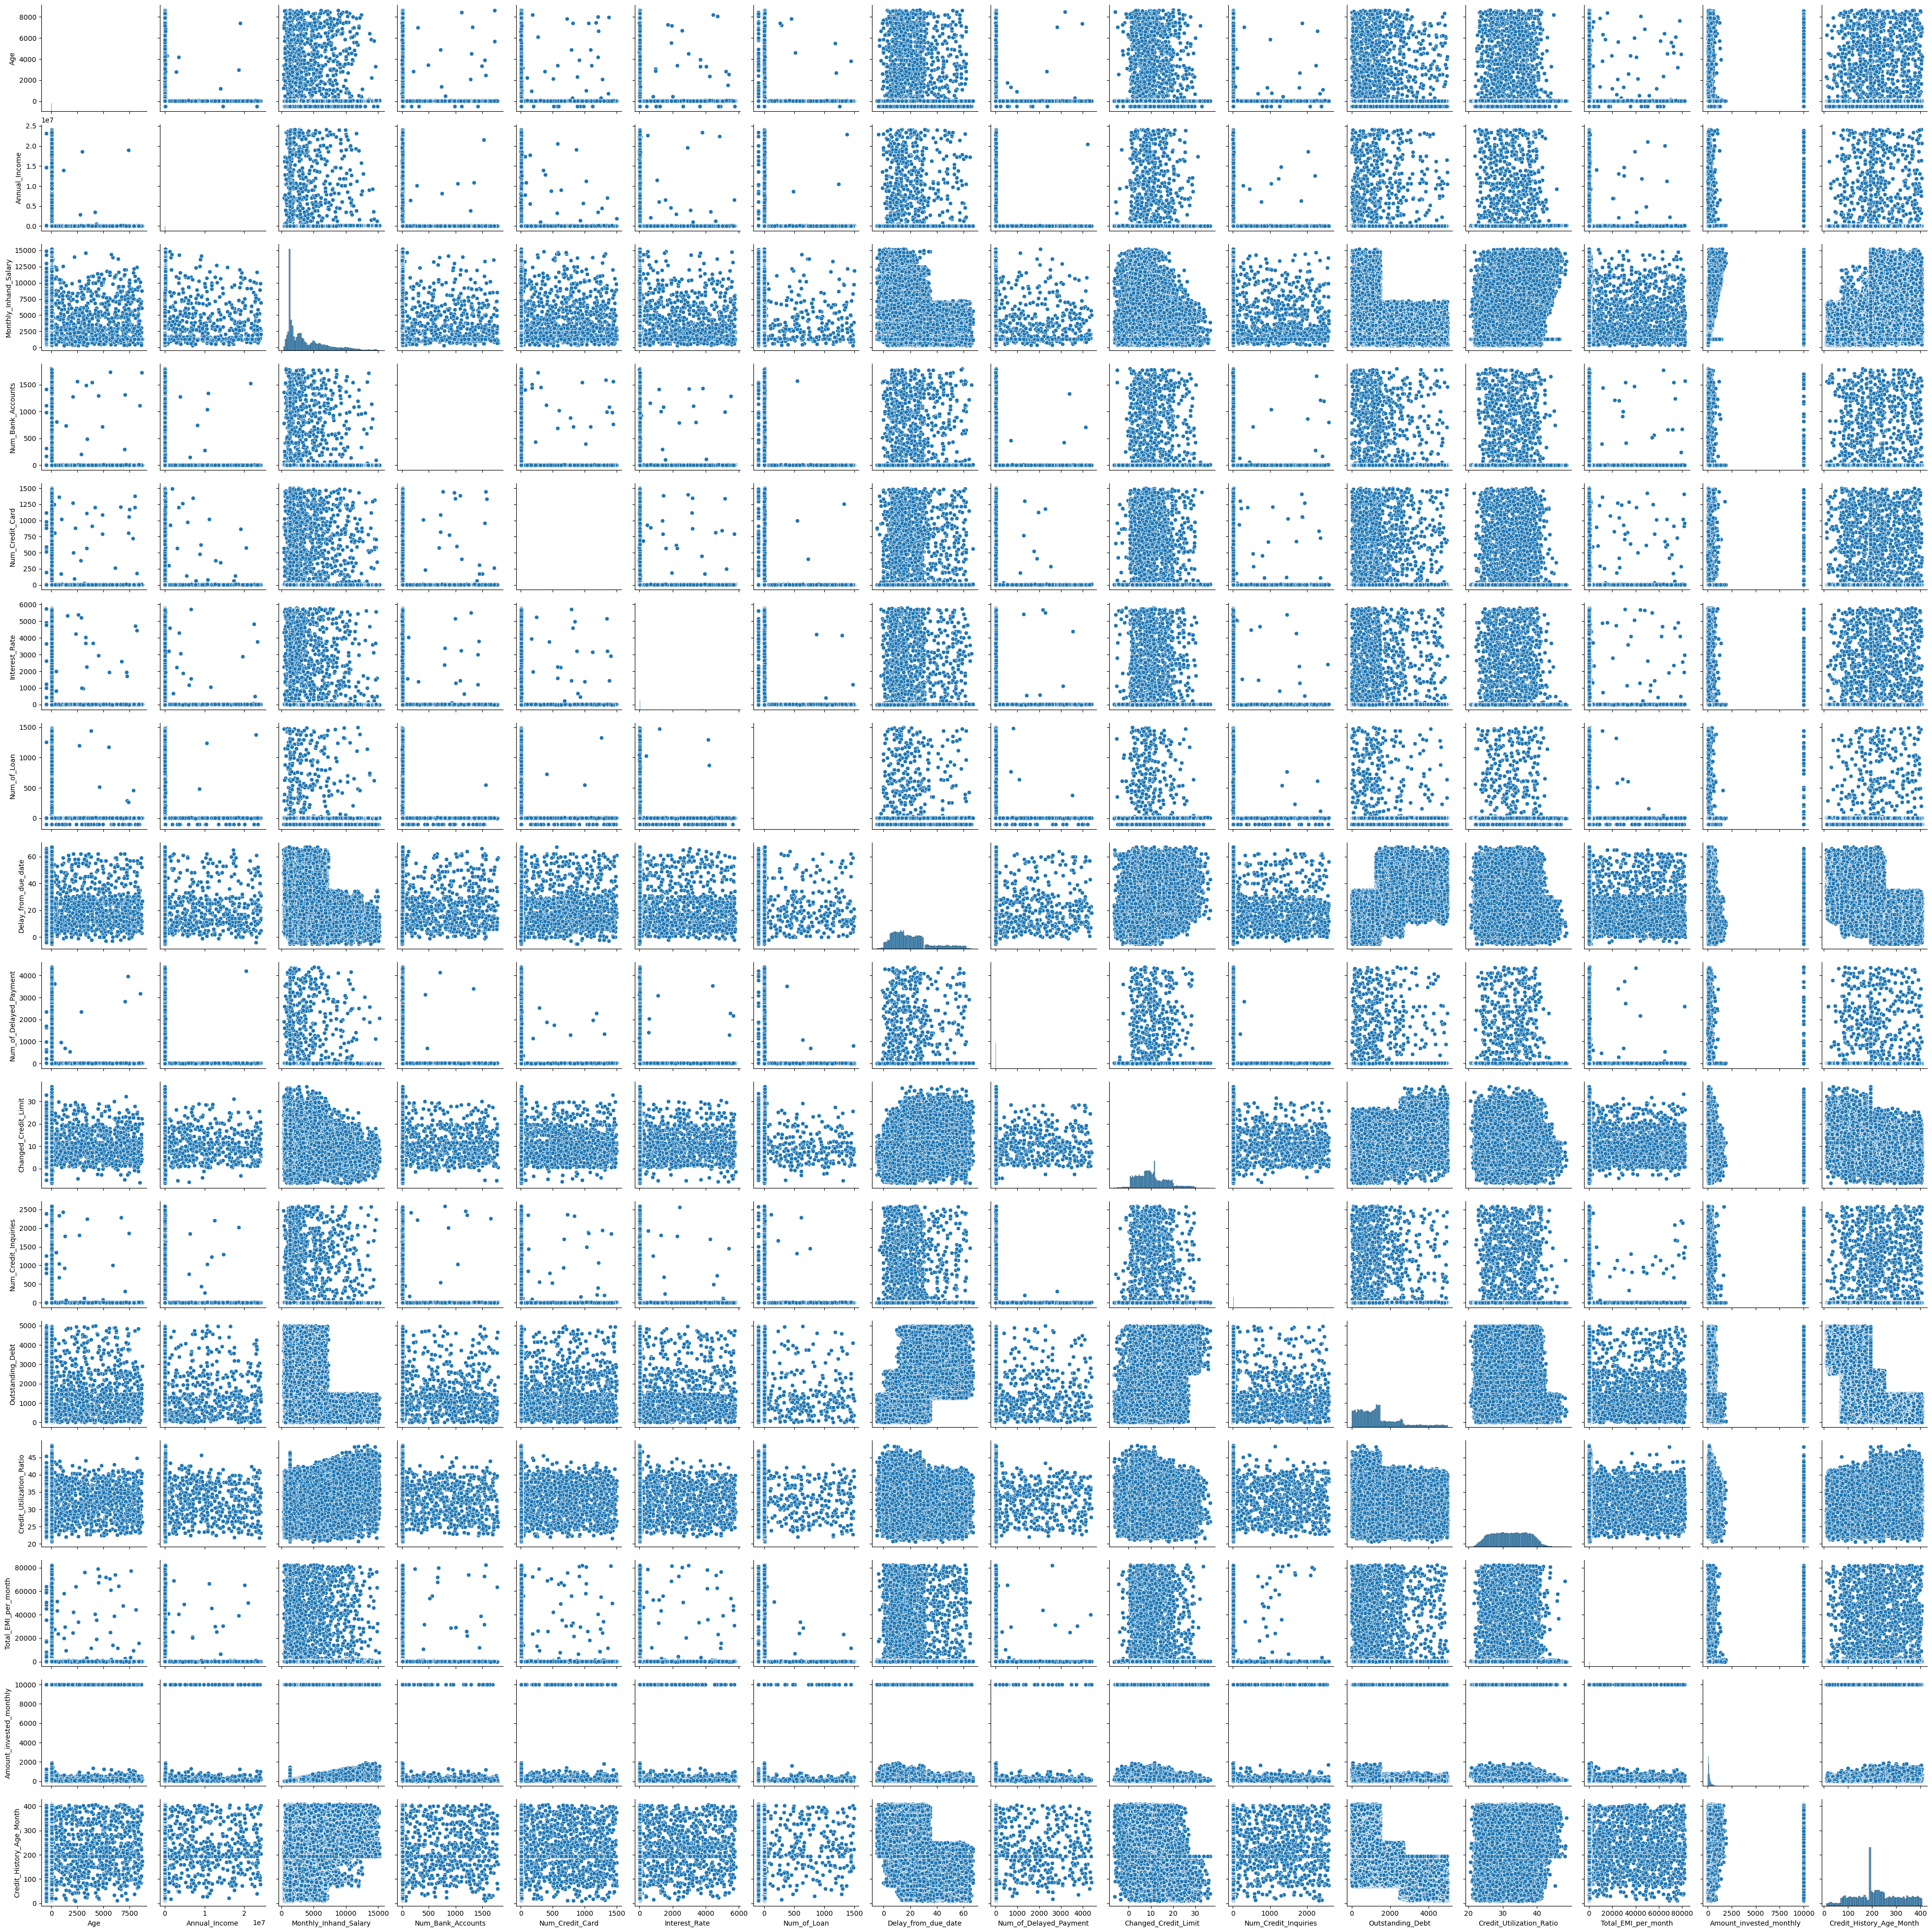

In [256]:
sns.pairplot(df)
plt.show()

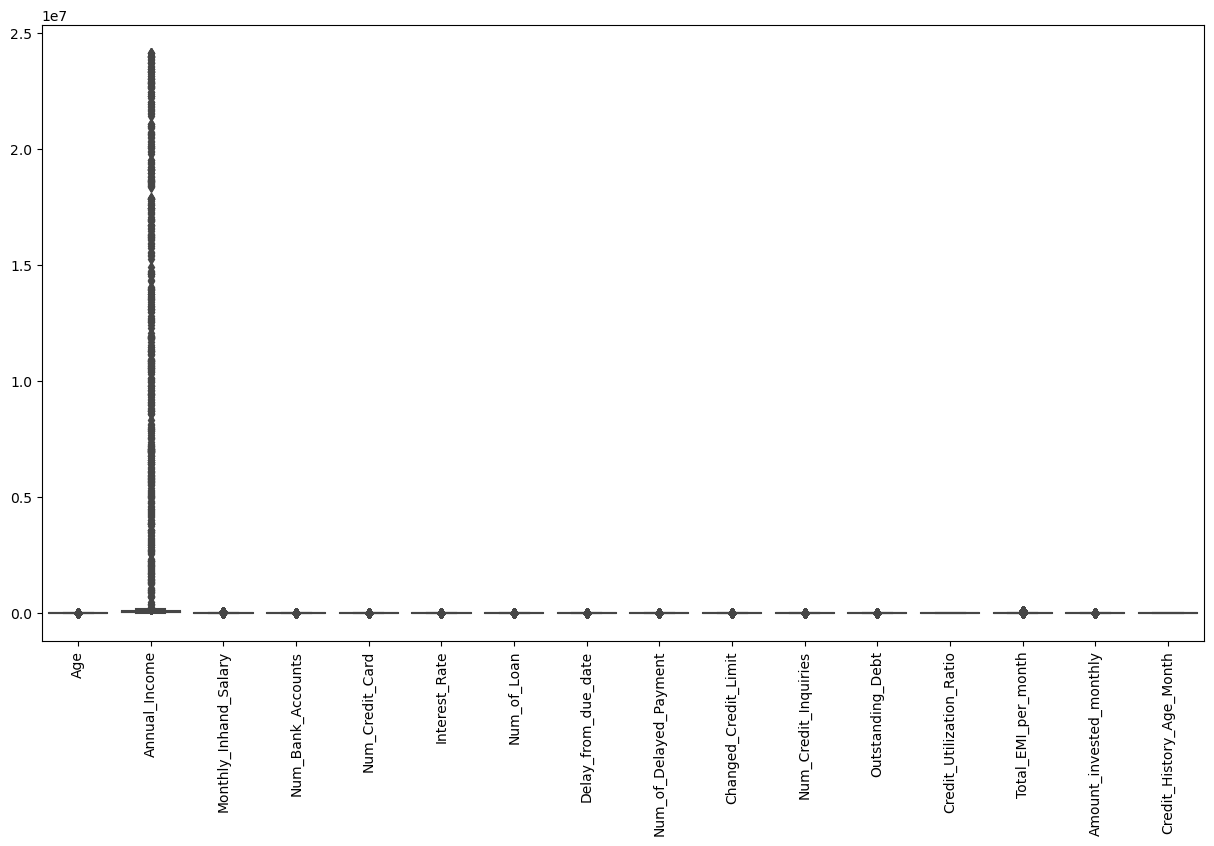

In [257]:
# Box plot to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [258]:
df.nunique()

Month                           4
Age                           928
SSN                         12501
Occupation                     15
Annual_Income               12989
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   252
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        411
Changed_Credit_Limit         3920
Num_Credit_Inquiries          750
Credit_Mix                      3
Outstanding_Debt            12203
Credit_Utilization_Ratio    50000
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               6
Monthly_Balance             46994
Credit_History_Age_Month      399
dtype: int64